<a href="https://colab.research.google.com/github/VictorSepulveda1994/Minor-Machine-Learning/blob/main/Proyecto_Final/Etapa04-Model/Model-Human_Activity_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final - Reconocimiento de Actividad Humana (HAR)

In [ ]:
# Librerías más utilizadas
import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

## **Entrega 01: OBTAIN**

En esta etapa del proyecto será necesario obtener los datos de las fuentes disponibles. En este caso se utilizará un conjunto de datos públicos de reconocimiento de actividad humana, disponible en los links entregados en el enunciado del proyecto.

### Procedimiento
 
 A continuación, se detallan los pasos realizados en ésta etapa.

#### 1. Comprobación de los links



*   El primer link en el enunciado de [cis.fordham.edu](https://www.cis.fordham.edu/wisdm/dataset.php) funciona correctamente.


*   El segundo link [archive.ics.uci.edu](https://archive.ics.uci.edu/ml/datasets/WISDM+Smartphone+and+Smartwatch+Activity+and+Biometrics+Dataset) no funciona correctamente y aparece un mensaje mencionando que los datos no aparecen o no existen.

Por lo tanto, se utilizará la fuente del primer link.

#### 2. Descarga de los datos



Dado que los archivos están comprimidos en formato "tar.gz", y la plataforma de github solo soporta archivo de hasta 25Mb, para este caso se emplearán dos métodos para utilizarlos en Colab:

##### 2.1. Método Automático (*Recomendado*)

In [ ]:
#Se instala el módulo "wget" con el siguiente comando
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Se importa el módulo "wget"
import wget

In [ ]:
#Se asigna el link del botón de descarga de la página cis.fordham.edu
url = "https://www.cis.fordham.edu/wisdm/includes/datasets/latest/WISDM_ar_latest.tar.gz"

In [ ]:
#Se descarga el "archivo.tar.gz" con todo su contenido
wget.download(url, '/content/WISDM_ar_v1.1_raw.tar.gz')

'/content/WISDM_ar_v1.1_raw.tar (1).gz'

In [ ]:
#Se descomprime el archivo "WISDM_ar_v1.1_raw.tar.gz"
import tarfile 
file = tarfile.open('WISDM_ar_v1.1_raw.tar.gz') 
print(file.getnames()) 
file.extractall('./')
file.close() 

['WISDM_ar_v1.1', 'WISDM_ar_v1.1/readme.txt', 'WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt', 'WISDM_ar_v1.1/WISDM_ar_v1.1_raw_about.txt', 'WISDM_ar_v1.1/WISDM_ar_v1.1_transformed.arff', 'WISDM_ar_v1.1/WISDM_ar_v1.1_trans_about.txt']




> **NOTA:** El archivo de texto que se utilizará "WISDM_ar_v1.1_raw.txt", estará dentro de la carpeta "WISDM_ar_v1.1".

##### 2.2. Método Manual (*Omitir si usó el Método Automático*)

* Ir a [cis.fordham.edu](https://www.cis.fordham.edu/wisdm/dataset.php)


* En la sección "Activity Prediction", hacer click en el botón "Download Latest Version" para descargar el archivo comprimido al computador.

* Descomprimir el archivo.tar.gz

* Subir el archivo "WISDM_ar_v1.1_raw.txt" al almacenamiento de sesión de Colab con el siguiente código.

In [ ]:
#from google.colab import files #Descomentar si es necesario.
#files.upload()                 #Descomentar si es necesario.

* Esperar a que se suba el ".txt", ya que, éste contiene una gran cantidad de datos (49Mb aproximadamente).

#### 3. Vista de los datos

Ahora que los datos ya están descargados y subidos a Colab, es posible utilizarlos. Para ello, se realizará una vista general de los datos antes de continuar con la siguiente etapa.

In [ ]:
# Cargar el archivo de texto. La ruta dependerá de como el archivo se descargó (método automático o manual).
df = pd.read_table("./WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt", header=None)

In [ ]:
# Dataframe con los datos
df.head()

,0
0,"33,Jogging,49105962326000,-0.6946377,12.680544..."
1,"33,Jogging,49106062271000,5.012288,11.264028,0..."
2,"33,Jogging,49106112167000,4.903325,10.882658,-..."
3,"33,Jogging,49106222305000,-0.61291564,18.49643..."
4,"33,Jogging,49106332290000,-1.1849703,12.108489..."


## **Entrega 02: SCRUB**

En esta etapa del proyecto será necesario limpiar y filtrar los datos.

### Procedimiento
 A continuación, se detallan los pasos realizados en ésta etapa.

#### 1. Eliminar filas con datos faltantes

Uno de los pasos iniciales en la limpieza de datos consiste en eliminar aquellas filas que contengan datos faltantes. Estas líneas generalmente no aportan información y pueden complicar la etapa de entrenamiento y validación de muchos modelos predictivos.

In [ ]:
#Se vuelve a procesar el archivo "WISDM_ar_v1.1_raw.txt"
file = open("./WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt")
lines = file.readlines()

processedList = []

# Se recorre el archivo, eliminando filas con datos faltantes y separando las "columnas"
for i, line in enumerate(lines):
    try:
        line = line.split(',')
        last = line[5].split(';')[0]
        last = last.strip()
        if last == '':
            break;
        temp = [line[0], line[1], line[2], line[3], line[4], last]
        processedList.append(temp)
    except:
        print('Error at line number: ', i)

Error at line number:  281873
Error at line number:  281874
Error at line number:  281875


#### 2. Agregar al DataFrame los nombres de las columnas

En ocasiones al crear los data frames el sistema asigna nombres genéricos y correlativos a las columnas. Es recomendable renombrar las columnas por nombres significativos para favorecer el análisis posterior de los datos.

In [ ]:
# Se crea un array con los nombres de las columnas
columns = ['user', 'activity', 'time', 'x', 'y', 'z']
# Los nombres de las columnas y la lista procesada son insertadas en un nuevo dataframe
data = pd.DataFrame(data = processedList, columns = columns)

#### 3. Visualizar las 5 primeras filas del DataFrame (.head())

Siempre es buena medida visualizar algunas líneas del dataframe para tener una idea concreta del contenido.

In [ ]:
data.head(5)

,user,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.1849703,12.108489,7.205164


#### 4. Buscar datos nulos y eliminarlos si es que existen

In [ ]:
data.isnull().sum()

user        0
activity    0
time        0
x           0
y           0
z           0
dtype: int64

> **NOTA:** No hay datos nulos.



#### 5. Visualizar los tipo de datos a los que pertenece cada columna (.info())

Es necesario tener un detalle de cuantas variables están considerando y el tipo de datos que pertenecen para verificar si es posible utilizarla directamente para el modelo predictivo o si es necesario realizar una transformación del tipo de dato.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user      343416 non-null  object
 1   activity  343416 non-null  object
 2   time      343416 non-null  object
 3   x         343416 non-null  object
 4   y         343416 non-null  object
 5   z         343416 non-null  object
dtypes: object(6)
memory usage: 15.7+ MB


#### 6. Cambiar el tipo de datos de las variables predictoras a valores reales, para realizar la clasificación

*Muchas de las variables contenidas en el DataFrame originalmente se encuentran en el tipo de dato 'object'. En ese formato las variables no pueden ser interpretadas como vectores. Recordemos que la mayoría de los modelos de Machine Learning estudiados operan en el espacio vectorial. Por esta razón las variables que formarán parte del modelo predictivo deben ser transformadas a un formato numérico como 'Float' o 'integer'.*

Para este proyecto en particular se pide transformar  al tipo de dato Float, las variables del acelerómetro en el eje $x$, $y$ y $z$


In [ ]:
data['x'] = data['x'].astype('float')
data['y'] = data['y'].astype('float')
data['z'] = data['z'].astype('float')

#### 7. Imprimir los tipos de datos de las variables del DataFrame

*Se recomienda volver a ejecutar el comando info para verificar que efectivamente las variables cambiaron su tipo de dato y que ahora se pueden procesar con los modelos predictivos.*

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user      343416 non-null  object 
 1   activity  343416 non-null  object 
 2   time      343416 non-null  object 
 3   x         343416 non-null  float64
 4   y         343416 non-null  float64
 5   z         343416 non-null  float64
dtypes: float64(3), object(3)
memory usage: 15.7+ MB


#### 8. Eliminar las columnas que no se utilizaran para la clasificación

*En este caso deberíamos conservar la actividad respectiva y las variables asociadas al acelerómetro*

In [ ]:
df = data.drop(['user', 'time'], axis = 1).copy()
df.head()

,activity,x,y,z
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164


#### 9. Balanceo de datos

Utilizar el comando value_counts para obtener un detalle de cuantas instancias se tienen por actividad. El objetivo consiste en identificar la presencia del balance o desbalance en las categorías a modelar

In [ ]:
data['activity'].value_counts()

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

Este proyecto considera datos con un desbalance de clases. Es necesario balancearlos para que los modelos operen de manera adecuada. Existen muchas maneras de realizar un balance, pero en este proyecto utilizaremos una estrategia sencilla e intuitiva. Simplemente debe identificar la actividad que contenga el número menor de instancias. Se debe realizar un muestreo para las otras actividades utilizando ese valor. De esta manera todas las clases tendrán la misma cantidad de instancias.

In [ ]:
Walking = df[df['activity']=='Walking'].head(3555).copy()
Jogging = df[df['activity']=='Jogging'].head(3555).copy()
Upstairs = df[df['activity']=='Upstairs'].head(3555).copy()
Downstairs = df[df['activity']=='Downstairs'].head(3555).copy()
Sitting = df[df['activity']=='Sitting'].head(3555).copy()
Standing = df[df['activity']=='Standing'].copy()

Establecer el número de instancias y dimensiones del data frame resultante *(shape)*.

In [ ]:
balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([Walking, Jogging, Upstairs, Downstairs, Sitting, Standing])
balanced_data.shape

(21330, 4)

Volver a imprimir la cantidad de instancias por categoría para verificar que todo esté en orden. *(value_counts)*.

In [ ]:
balanced_data['activity'].value_counts()

Walking       3555
Jogging       3555
Upstairs      3555
Downstairs    3555
Sitting       3555
Standing      3555
Name: activity, dtype: int64

Volver a visualizar las cinco primeras líneas del DataFrame para revisar que todo esté en orden *(head)*.

In [ ]:
balanced_data.head()

,activity,x,y,z
597,Walking,0.844462,8.008764,2.792171
598,Walking,1.116869,8.621680,3.786457
599,Walking,-0.503953,16.657684,1.307553
600,Walking,4.794363,10.760075,-1.184970
601,Walking,-0.040861,9.234595,-0.694638


#### 10. Estandarización de los datos

Separar las variables predictoras (X) de las ctegorias o etiquetas (y).

In [ ]:
X = balanced_data[['x', 'y', 'z']]
y = balanced_data['activity']

Estandarizar los datos numericos (*StandardScaler)*:
*Para el caso de la estandarización de los datos se pueden usar distintas técnicas, como la normalización 01, estandarización entre -1 y 1 o el denominado Z-Score. En este caso usaremos la función Standard Scaler de Python con sus valores por defecto.*

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

datos = pd.DataFrame(data = X, columns = ['x', 'y', 'z'])

datos.head()

,x,y,z
0,0.000503,-0.099190,0.337933
1,0.073590,0.020386,0.633446
2,-0.361275,1.588160,-0.103312
3,1.060258,0.437573,-0.844119
4,-0.237028,0.139962,-0.698386


#### 11. Como último paso debe reconstruir el dataframe pegando las columnas de los variables predicadores (X) y las categorías (y).

Transformación de la etiqueta "y" a predecir

In [ ]:
etiqueta = LabelEncoder()
datos['etiqueta'] = etiqueta.fit_transform(y)
etiqueta.classes_

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype=object)

Reconstrucción del dataframe con la nueva columna.

In [ ]:
datos.head()

,x,y,z,etiqueta
0,0.000503,-0.099190,0.337933,5
1,0.073590,0.020386,0.633446,5
2,-0.361275,1.588160,-0.103312,5
3,1.060258,0.437573,-0.844119,5
4,-0.237028,0.139962,-0.698386,5


## **Entrega 03: EXPLORE**

En esta etapa se deberán examinar los datos.

### Procedimiento
 A continuación, se detallan los pasos realizados en ésta etapa.

#### 1. Comprobación de desequilibrios de datos

Recordar que el balanceo de datos y la eliminación de columnas que no se usarían se solicitó en la etapa anterior.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


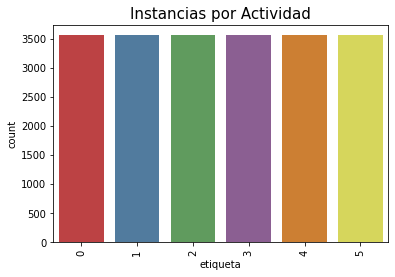

In [ ]:
# Gráfico de instancias por actividad. Hay 3555 por cada una.
plt.title('Instancias por Actividad', fontsize=15)
sns.countplot(datos.etiqueta)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Recordar que las etiquetas fueron convertidas en la etapa anterior y van del 0 al 5.
# 0 es Downstairs y 5 es Walking
etiqueta.classes_

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype=object)

#### 2. Distribución de los datos

No olvidar que los datos ya fueron escalados en la etapa anterior.

(array([  43.,  180., 2105., 3205., 8661., 5385., 1130.,  410.,  169.,
          42.]),
 array([-4.04849076, -3.1637782 , -2.27906564, -1.39435308, -0.50964052,
         0.37507203,  1.25978459,  2.14449715,  3.02920971,  3.91392226,
         4.79863482]),
 <a list of 10 Patch objects>)

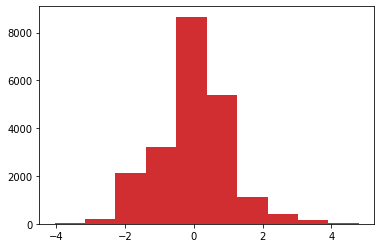

In [ ]:
# Histograma de los datos en X
plt.hist(datos.x)

(array([  39.,   87.,  106., 1650., 1010., 2319., 8179., 4700., 1963.,
        1277.]),
 array([-4.28435117, -3.64023495, -2.99611874, -2.35200252, -1.7078863 ,
        -1.06377009, -0.41965387,  0.22446235,  0.86857856,  1.51269478,
         2.156811  ]),
 <a list of 10 Patch objects>)

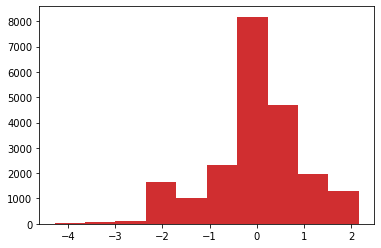

In [ ]:
# Histograma de los datos en Y
plt.hist(datos.y)

(array([  23.,   78.,  276., 1747., 9343., 6552., 2457.,  715.,   95.,
          44.]),
 array([-4.94486852, -3.96684179, -2.98881506, -2.01078833, -1.0327616 ,
        -0.05473487,  0.92329187,  1.9013186 ,  2.87934533,  3.85737206,
         4.83539879]),
 <a list of 10 Patch objects>)

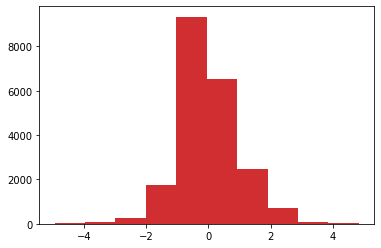

In [ ]:
# Histograma de los datos en Z
plt.hist(datos.z)

#### 3. Gráfico de Cajas

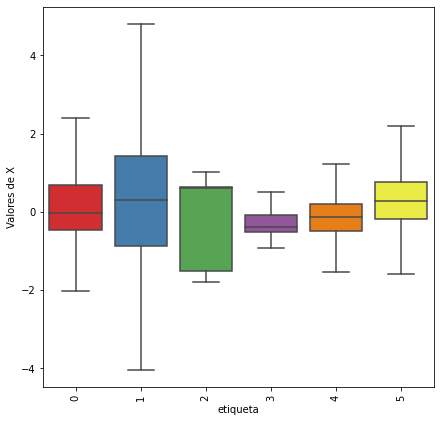

In [ ]:
# Gráfico de Caja de X
plt.figure(figsize=(7,7))
sns.boxplot(x='etiqueta', y='x',data=datos, showfliers=False, saturation=1)
plt.ylabel('Valores de X')
plt.xticks(rotation=90)
plt.show()

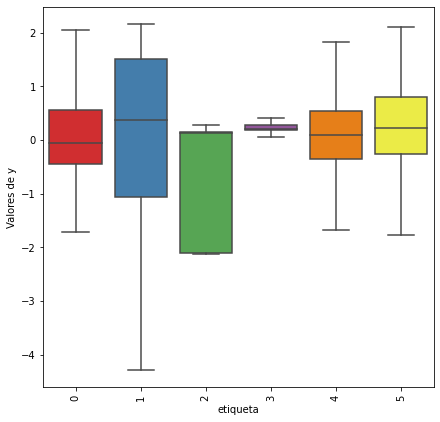

In [ ]:
# Gráfico de Caja de Y
plt.figure(figsize=(7,7))
sns.boxplot(x='etiqueta', y='y',data=datos, showfliers=False, saturation=1)
plt.ylabel('Valores de y')
plt.xticks(rotation=90)
plt.show()

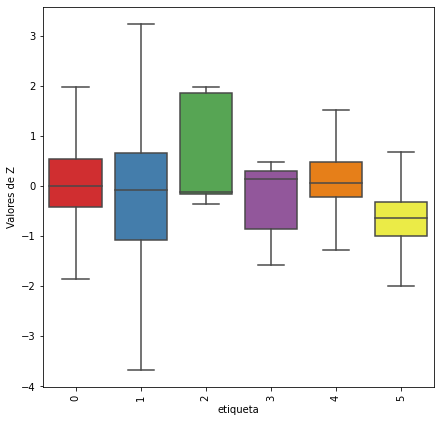

In [ ]:
# Gráfico de Caja de Z
plt.figure(figsize=(7,7))
sns.boxplot(x='etiqueta', y='z',data=datos, showfliers=False, saturation=1)
plt.ylabel('Valores de Z')
plt.xticks(rotation=90)
plt.show()

## **Entrega 04: MODEL**

En esta etapa se deberá realizar el modelado, entrenamiento y prueba de los tres tipos de modelos a utilizar.

### Procedimiento
A continuación, se detallan los modelos realizados en ésta etapa.

In [ ]:
from sklearn.svm import SVC #utilizar SVM
from sklearn import metrics #para comprobar la precisión del modelo
from sklearn.metrics import classification_report, confusion_matrix, precision_score
from sklearn.model_selection import train_test_split #dividir en conjunto de entrenamiento y prueba.
from sklearn.ensemble import RandomForestClassifier #utilizar Random Forest
from sklearn import datasets #importar conjunto de datos
import xgboost as xgb #utilizar xgboost

#### 1. SVM

#### 2. Random Forest

#### 3. XG Boost

### Resultados

Tabla